In [2]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.2 MB/s eta 0:00:00a 0:00:01


In [3]:
import pandas as pd
import numpy as np
import category_encoders as ce
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [4]:
# Read in the csv
df = pd.read_csv("../data/raw/beer_reviews.csv")
# Select necessary columns
df = df[['review_overall','review_appearance', 'review_aroma', 'review_palate', 'review_taste', 'beer_abv', 'brewery_name', 'beer_name', 'review_profilename','beer_style']]
df.head()

,review_overall,review_appearance,review_aroma,review_palate,review_taste,beer_abv,brewery_name,beer_name,review_profilename,beer_style
0,1.5,2.5,2.0,1.5,1.5,5.0,Vecchio Birraio,Sausa Weizen,stcules,Hefeweizen
1,3.0,3.0,2.5,3.0,3.0,6.2,Vecchio Birraio,Red Moon,stcules,English Strong Ale
2,3.0,3.0,2.5,3.0,3.0,6.5,Vecchio Birraio,Black Horse Black Beer,stcules,Foreign / Export Stout
3,3.0,3.5,3.0,2.5,3.0,5.0,Vecchio Birraio,Sausa Pils,stcules,German Pilsener
4,4.0,4.0,4.5,4.0,4.5,7.7,Caldera Brewing Company,Cauldron DIPA,johnmichaelsen,American Double / Imperial IPA


In [5]:
df.shape

(1048575, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   review_overall      1048575 non-null  float64
 1   review_appearance   1048575 non-null  float64
 2   review_aroma        1048575 non-null  float64
 3   review_palate       1048575 non-null  float64
 4   review_taste        1048575 non-null  float64
 5   beer_abv            1005757 non-null  float64
 6   brewery_name        1048566 non-null  object 
 7   beer_name           1048575 non-null  object 
 8   review_profilename  1048340 non-null  object 
 9   beer_style          1048575 non-null  object 
dtypes: float64(6), object(4)
memory usage: 80.0+ MB


In [7]:
df.isnull().sum()

review_overall            0
review_appearance         0
review_aroma              0
review_palate             0
review_taste              0
beer_abv              42818
brewery_name              9
beer_name                 0
review_profilename      235
beer_style                0
dtype: int64

In [8]:
df.describe().round(decimals=2)

,review_overall,review_appearance,review_aroma,review_palate,review_taste,beer_abv
count,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1005757.00
mean,3.83,3.86,3.76,3.76,3.81,7.07
std,0.71,0.60,0.68,0.67,0.71,2.32
min,0.00,0.00,1.00,1.00,1.00,0.01
25%,3.50,3.50,3.50,3.50,3.50,5.30
50%,4.00,4.00,4.00,4.00,4.00,6.50
75%,4.50,4.00,4.00,4.00,4.50,8.50
max,5.00,5.00,5.00,5.00,5.00,57.70


In [9]:
for col in df.columns:
    print(f'Unique values in {col}: {df[col].nunique()}')

Unique values in review_overall: 10
Unique values in review_appearance: 10
Unique values in review_aroma: 9
Unique values in review_palate: 9
Unique values in review_taste: 9
Unique values in beer_abv: 423
Unique values in brewery_name: 3793
Unique values in beer_name: 37770
Unique values in review_profilename: 28761
Unique values in beer_style: 104


In [10]:
# Handle missing values
df['beer_abv'].fillna(df['beer_abv'].median(), inplace=True)
df['brewery_name'].fillna('unknown', inplace=True)
df['review_profilename'].fillna('unknown', inplace=True)

In [11]:
# Encode the beer_style column
le = LabelEncoder()
df['beer_style'] = le.fit_transform(df['beer_style'])

In [12]:
# Select columns to be encoded
cols_to_encode = ['brewery_name','beer_name', 'review_profilename']

# Instantiate encoder
encoder = ce.TargetEncoder(cols=cols_to_encode)

In [13]:
# Fit and transform the columns
df_encoded = encoder.fit_transform(df[cols_to_encode], df['beer_style'])

# Replace original columns with encoded ones in the dataframe
df.drop(cols_to_encode, axis=1, inplace=True)
df = pd.concat([df, df_encoded], axis=1)

In [14]:
# Assuming that df_X contains your features and df_y contains your target
df_X = df.drop('beer_style', axis=1)
df_y = df['beer_style']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(838860, 9)
(209715, 9)
(838860,)
(209715,)


In [16]:
import tensorflow as tf
import numpy as np

In [17]:
tf.random.set_seed(42)

In [19]:
model = tf.keras.Sequential()

In [20]:
from tensorflow.keras.layers import Dense, Flatten

In [21]:
from tensorflow.keras.layers import Dense, Dropout

In [23]:
# layer1 = Dense(128, activation='relu', input_shape=[20], kernel_regularizer=regularizer)
layer1 = Dense(100, activation='relu')
top_layer = Dense(104, activation='softmax')

In [24]:
# model.add(flatten_layer)
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layer1)
# model.add(Dropout(0.3))
model.add(top_layer)

In [25]:
# optimizer = tf.keras.optimizers.RMSprop(0.001)
optimizer = tf.keras.optimizers.Adam(0.001)

In [26]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               1280      
_________________________________________________________________
dense (Dense)                (None, 100)               12900     
_________________________________________________________________
dense_1 (Dense)              (None, 104)               10504     
Total params: 24,684
Trainable params: 24,684
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=256, validation_split=0.2, verbose=1)
# history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

2023-07-03 14:07:00.483514: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
2622/2622 [==============================] - 17s 6ms/step - loss: 2.0470 - accuracy: 0.4357 - val_loss: 1.7535 - val_accuracy: 0.5029
Epoch 2/20
2622/2622 [==============================] - 17s 7ms/step - loss: 1.6377 - accuracy: 0.5387 - val_loss: 1.5109 - val_accuracy: 0.5807
Epoch 3/20
2622/2622 [==============================] - 21s 8ms/step - loss: 1.4179 - accuracy: 0.6127 - val_loss: 1.3341 - val_accuracy: 0.6461
Epoch 4/20
2622/2622 [==============================] - 18s 7ms/step - loss: 1.2727 - accuracy: 0.6640 - val_loss: 1.2185 - val_accuracy: 0.6849
Epoch 5/20
2622/2622 [==============================] - 19s 7ms/step - loss: 1.1850 - accuracy: 0.6917 - val_loss: 1.1436 - val_accuracy: 0.7065
Epoch 6/20
2622/2622 [==============================] - 18s 7ms/step - loss: 1.1293 - accuracy: 0.7086 - val_loss: 1.0952 - val_accuracy: 0.7198
Epoch 7/20
2622/2622 [==============================] - 19s 7ms/step - loss: 1.0882 - accuracy: 0.7202 - val_loss: 1.0594 - val_ac

In [29]:
# Evaluate the model
model.evaluate(X_test, y_test)

6554/6554 [==============================] - 11s 2ms/step - loss: 0.8942 - accuracy: 0.7751


[0.8942193388938904, 0.775104284286499]

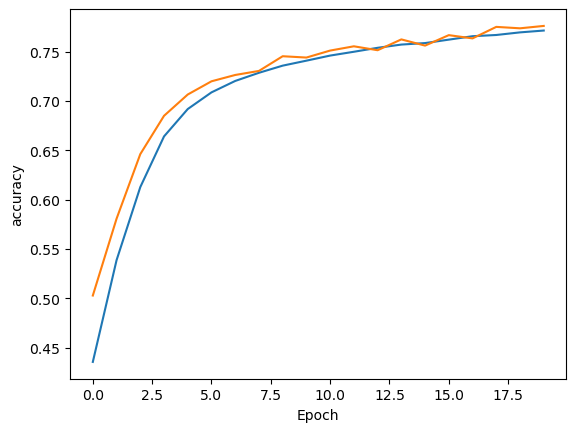

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='MSE training')
plt.plot(history.history['val_accuracy'], label='MSE validation')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.show()

In [32]:
sparse_pred_test = model.predict(X_test)
sparse_pred_test[0]

array([3.81468453e-05, 1.71692227e-05, 3.35835677e-04, 9.00301529e-07,
       4.52939958e-06, 2.17948342e-04, 3.32762684e-05, 7.99308182e-04,
       3.12121983e-07, 6.71634871e-06, 1.47510439e-08, 2.82479217e-04,
       9.98058259e-01, 6.88442725e-08, 1.73663342e-04, 1.56385624e-08,
       4.78009589e-34, 0.00000000e+00, 2.47013159e-05, 5.25324718e-14,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.21942923e-06, 7.40106290e-29, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.33997163e-09, 0.00000000e+00, 0.00000000e+00,
       5.12346215e-35, 1.47192687e-29, 2.58934614e-17, 8.44589132e-23,
       7.17067697e-36, 6.06595970e-33, 2.37796093e-15, 1.47037701e-06,
       5.30283817e-10, 0.00000000e+00, 5.63222161e-19, 4.08853111e-08,
       3.51400332e-11, 0.00000000e+00, 1.04518044e-11, 0.00000000e+00,
       8.20727372e-37, 3.85781611e-08, 3.74923776e-33, 1.12638894e-07,
      

In [33]:
pred_test = np.argmax(sparse_pred_test, 1)
pred_test[0]

12

In [34]:
y_test[0]

65

In [36]:
model.save('../models/tf_multi_class')

INFO:tensorflow:Assets written to: ../models/tf_multi_class/assets
